* This file uses source of dataset as 1416 csv file dataset which is extracted using the data extraction script.
* The dataset is cleaned and formatted.
* Feature engineering is done to create features like distance and displacement
* Set of simple learning models with hyper-parameter optimisation is done to form stack ensemble model
* Isolation forest model is also done


In [3]:
# Importing required packages
import glob
from operator import contains
import os, json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import re
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.15f}'.format
import datetime as dt
from sklearn.ensemble import IsolationForest


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My Drive/Colab Notebooks/Mercy

In [5]:
# Importing the csv file
# data = pd.read_csv('C:/Users/CJ/final.csv')
# data = pd.read_csv('final.csv')
data = pd.read_csv('final_1416.csv')
# data = pd.read_csv('D:/clair/notes/Sem4/Capstone/dataset/export/feb_26_v_1.0/VeReMi_54000_57600_2019-11-28_10_42_1.csv')
data.head()

,type,rcvTime,sendTime,sender,senderPseudo,messageID,file_name,density_level,pos_x,pos_y,...,acl_noise_y,acl_noise_z,hed_x,hed_y,hed_z,hed_noise_x,hed_noise_y,hed_noise_z,attack?,receiver_id
0,3,57511.049951916953432,57511.049951916953432,9891.000000000000000,1098915.000000000000000,19655176.000000000000000,traceJSON-10005-10003-A0-57511-15,2,137.286902555145161,983.827257071713575,...,0.000021258383547,0.000000000000000,-0.036686450374153,0.999326825597584,0.000000000000000,4.249188192325861,0.982232769632962,0.000000000000000,1,10005
1,3,57511.146510437574761,57511.146510437574761,9951.000000000000000,1099515.000000000000000,19655429.000000000000000,traceJSON-10005-10003-A0-57511-15,2,153.904668561966304,899.505911646706977,...,0.000000000000013,0.000000000000000,0.038287039242177,-0.999266782509089,0.000000000000000,9.636084890334937,12.342153049505139,0.000000000000000,1,10005
2,3,57511.162338829126384,57511.162338829126384,10011.000000000000000,10100115.000000000000000,19655584.000000000000000,traceJSON-10005-10003-A0-57511-15,2,142.981000552607952,1038.129049878944215,...,0.000424009628911,0.000000000000000,0.073948678480006,-0.997262048285735,0.000000000000000,7.179251774207310,7.627622845974860,0.000000000000000,1,10005
3,3,57511.590730855474249,57511.590730855474249,9957.000000000000000,1099575.000000000000000,19656248.000000000000000,traceJSON-10005-10003-A0-57511-15,2,149.931080349069163,899.035172728899624,...,0.000000000062721,0.000000000000000,0.016440994151280,-0.999864837721238,0.000000000000000,16.013310920410738,21.388849080932467,0.000000000000000,0,10005
4,3,57511.641619857240585,57511.641619857240585,9963.000000000000000,1099635.000000000000000,19656466.000000000000000,traceJSON-10005-10003-A0-57511-15,2,152.753405416050725,906.773024725052210,...,0.000000000000000,0.000000000000000,0.047863865685627,-0.998853868371959,0.000000000000000,6.510268774099048,7.224761247950584,0.000000000000000,0,10005


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820097 entries, 0 to 820096
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   type           820097 non-null  int64  
 1   rcvTime        820097 non-null  float64
 2   sendTime       820097 non-null  float64
 3   sender         820097 non-null  float64
 4   senderPseudo   820097 non-null  float64
 5   messageID      820097 non-null  float64
 6   file_name      820097 non-null  object 
 7   density_level  820097 non-null  int64  
 8   pos_x          820097 non-null  float64
 9   pos_y          820097 non-null  float64
 10  pos_z          820097 non-null  float64
 11  pos_noise_x    820097 non-null  float64
 12  pos_noise_y    820097 non-null  float64
 13  pos_noise_z    820097 non-null  float64
 14  spd_x          820097 non-null  float64
 15  spd_y          820097 non-null  float64
 16  spd_z          820097 non-null  float64
 17  spd_noise_x    820097 non-nul

### Data Cleaning and formatting

In [7]:
from datetime import datetime
#Dropping the columns that are of no use
data.drop(['type'],axis=1,inplace=True)
data.drop(['pos_z'],axis=1,inplace=True)
data.drop(['spd_z'],axis=1,inplace=True)
data.drop(['acl_z'],axis=1,inplace=True)
data.drop(['hed_z'],axis=1,inplace=True)
data['rcvTime_numeric'] = data['rcvTime']
data['sendTime_numeric'] = data['sendTime']
data[['rcvTime','sendTime']]  = data[['rcvTime','sendTime']].apply(pd.to_datetime)
data[['sender','messageID']]  = data[['sender','messageID']].fillna(0.0).astype(int)
data.rename(columns = {'attack?':'attack'}, inplace = True)
data['rcvTimeAsTime'] = data['rcvTime'].map(dt.datetime.time)
# apply(datetime.time)
#Dropping the columns with noise
for i in data.columns:
    if 'noise' in i:
        data.drop(i, axis=1, inplace=True)




In [8]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820097 entries, 0 to 820096
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   rcvTime           820097 non-null  datetime64[ns]
 1   sendTime          820097 non-null  datetime64[ns]
 2   sender            820097 non-null  int32         
 3   senderPseudo      820097 non-null  float64       
 4   messageID         820097 non-null  int32         
 5   file_name         820097 non-null  object        
 6   density_level     820097 non-null  int64         
 7   pos_x             820097 non-null  float64       
 8   pos_y             820097 non-null  float64       
 9   spd_x             820097 non-null  float64       
 10  spd_y             820097 non-null  float64       
 11  acl_x             820097 non-null  float64       
 12  acl_y             820097 non-null  float64       
 13  hed_x             820097 non-null  float64       
 14  hed_

,rcvTime,sendTime,sender,senderPseudo,messageID,file_name,density_level,pos_x,pos_y,spd_x,spd_y,acl_x,acl_y,hed_x,hed_y,attack,receiver_id,rcvTime_numeric,sendTime_numeric,rcvTimeAsTime
0,1970-01-01 00:00:00.000057511,1970-01-01 00:00:00.000057511,9891,1098915.000000000000000,19655176,traceJSON-10005-10003-A0-57511-15,2,137.286902555145161,983.827257071713575,1.354661693085098,3.904279797161307,0.034645573620179,-0.463354677954995,-0.036686450374153,0.999326825597584,1,10005,57511.049951916953432,57511.049951916953432,00:00:00.000057
1,1970-01-01 00:00:00.000057511,1970-01-01 00:00:00.000057511,9951,1099515.000000000000000,19655429,traceJSON-10005-10003-A0-57511-15,2,153.904668561966304,899.505911646706977,19.671425131174317,13.272349119084248,0.154777773706633,-2.049693655257135,0.038287039242177,-0.999266782509089,1,10005,57511.146510437574761,57511.146510437574761,00:00:00.000057
2,1970-01-01 00:00:00.000057511,1970-01-01 00:00:00.000057511,10011,10100115.000000000000000,19655584,traceJSON-10005-10003-A0-57511-15,2,142.981000552607952,1038.129049878944215,26.896996701957299,24.137761106685371,0.203488096706969,-2.744069501641253,0.073948678480006,-0.997262048285735,1,10005,57511.162338829126384,57511.162338829126384,00:00:00.000057
3,1970-01-01 00:00:00.000057511,1970-01-01 00:00:00.000057511,9957,1099575.000000000000000,19656248,traceJSON-10005-10003-A0-57511-15,2,149.931080349069163,899.035172728899624,0.206780659828718,-2.687713403544073,0.229570843679506,-2.986116588864178,0.016440994151280,-0.999864837721238,0,10005,57511.590730855474249,57511.590730855474249,00:00:00.000057
4,1970-01-01 00:00:00.000057511,1970-01-01 00:00:00.000057511,9963,1099635.000000000000000,19656466,traceJSON-10005-10003-A0-57511-15,2,152.753405416050725,906.773024725052210,0.071913888517510,-0.969420576222226,0.146568201862597,-1.975988839130557,0.047863865685627,-0.998853868371959,0,10005,57511.641619857240585,57511.641619857240585,00:00:00.000057


In [9]:

data.drop(['file_name'], axis=1, inplace=True)
data['sendTime_numeric']=data['sendTime'].map(dt.datetime.toordinal)
data['rcvTime_numeric']=data['rcvTime'].map(dt.datetime.toordinal)

### New Feature Generation

In [10]:
# skip the cells from running
# %%script echo skipping
from datetime import timedelta
data['pos_x_diff'] = data.sort_values(["sender","sendTime", "messageID"]).groupby(["sender", "receiver_id"])['pos_x'].diff()
data['pos_y_diff'] = data.sort_values(["sender","sendTime","messageID",]).groupby(["sender", "receiver_id"])['pos_y'].diff()
# dividing pos_y_diff by pos_x_diff and store it in y_diff/x_diff
data["y_diff/x_diff"] = data["pos_y_diff"].apply(lambda x: float(x)) / data["pos_x_diff"].apply(lambda x: float(x))
# Using Pythagorean Theorem calculating distance
data['distance_eu'] = np.sqrt((data['pos_x_diff']**2 + data['pos_y_diff']**2))
data["dis_angle"] = np.degrees(np.arctan(data["y_diff/x_diff"]))
data.drop(columns = ['pos_x_diff', 'pos_y_diff','y_diff/x_diff'], inplace = True)
data.fillna(0, inplace=True)
data.reset_index(drop=True, inplace=True)

### Sorting data by receive time and splitting data for training

In [11]:
# Sorting by receive time
data.sort_values(by=['rcvTime'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,rcvTime,sendTime,sender,senderPseudo,messageID,density_level,pos_x,pos_y,spd_x,spd_y,...,acl_y,hed_x,hed_y,attack,receiver_id,rcvTime_numeric,sendTime_numeric,rcvTimeAsTime,distance_eu,dis_angle
0,1970-01-01 00:00:00.000050408,1970-01-01 00:00:00.000050408,21,10215.000000000000000,16936,2,220.317917303648272,383.934935437669594,-0.078168163622794,0.525905153291198,...,2.616637002617828,-0.142980189511322,0.989725550547881,0,27,719163,719163,00:00:00.000050,0.000000000000000,0.000000000000000
1,1970-01-01 00:00:00.000050408,1970-01-01 00:00:00.000050408,27,10275.000000000000000,17018,2,223.030520488101104,364.802884416285281,-0.079870635180307,0.537359158655796,...,2.613037040001825,-0.147020325879710,0.989133471164647,0,21,719163,719163,00:00:00.000050,0.000000000000000,0.000000000000000
2,1970-01-01 00:00:00.000050409,1970-01-01 00:00:00.000050409,21,10215.000000000000000,17075,2,219.947049702855480,385.757716338412308,-0.421900962680975,2.838498011407711,...,2.169566146413223,-0.142233817434146,0.989833087534514,0,27,719163,719163,00:00:00.000050,1.860127143350750,-78.499437520680715
3,1970-01-01 00:00:00.000050409,1970-01-01 00:00:00.000050409,27,10275.000000000000000,17117,2,222.765622516565202,366.657630560278733,-0.419577828663898,2.822925004092247,...,2.425224516331284,-0.142064310031641,0.989857430044970,0,21,719163,719163,00:00:00.000050,1.873567237646521,-81.871888548926208
4,1970-01-01 00:00:00.000050410,1970-01-01 00:00:00.000050410,9,1095.000000000000000,17151,2,1197.362034797699152,971.768939400884392,-11.762703940887320,-2.110692806707845,...,-0.319738065392786,-0.992752282476080,-0.120178640525395,0,15,719163,719163,00:00:00.000050,0.000000000000000,0.000000000000000


In [12]:
# Splitting the data into 80% as train and rest(20%) as test
total_size = len(data)
total_size
train_size = round(total_size*.8)
test_size = total_size - train_size
print('total', total_size, 'train_size', train_size, 'test_size', test_size)

total 820097 train_size 656078 test_size 164019


In [13]:
# Populating train and test data based on the index calculated in above cell
train_data = data[0:train_size]
test_data = data[train_size:train_size+test_size]
print('train_data_size', len(train_data), 'test_data_size', len(test_data))

train_data_size 656078 test_data_size 164019


In [14]:
# 12 features
X_train_12 = train_data[['messageID','sender','senderPseudo','pos_x','pos_y','spd_x','spd_y','acl_x','acl_y', 'hed_x','hed_y','rcvTime_numeric','distance_eu','dis_angle']]
X_test_12 = test_data[['messageID','sender','senderPseudo','pos_x','pos_y','spd_x','spd_y','acl_x','acl_y', 'hed_x','hed_y','rcvTime_numeric','distance_eu','dis_angle']]
y_train_12 = train_data[['attack']]
y_test_12 = test_data[['attack']]

In [ ]:
# 11 features
X_train_11 = train_data[['messageID','senderPseudo','pos_x','pos_y','spd_x','spd_y','acl_x','acl_y', 'hed_x','hed_y','rcvTime_numeric']]
X_test_11 = test_data[['messageID','senderPseudo','pos_x','pos_y','spd_x','spd_y','acl_x','acl_y', 'hed_x','hed_y','rcvTime_numeric']]
y_train_11 = train_data[['attack']]
y_test_11 = test_data[['attack']]

In [ ]:
# 10 features
X_train_10 = train_data[['messageID','pos_x','pos_y','spd_x','spd_y','acl_x','acl_y', 'hed_x','hed_y','rcvTime_numeric']]
X_test_10 = test_data[['messageID','pos_x','pos_y','spd_x','spd_y','acl_x','acl_y', 'hed_x','hed_y','rcvTime_numeric']]
y_train_10 = train_data[['attack']]
y_test_10 = test_data[['attack']]

### SVM Classifier

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_12)

X_test = scaler.transform(X_test_12)

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train_12)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test_12, y_pred)))

### XGboost

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_12,y_train_12)
pred = model.predict(X_train_12)
print(f'Training accuracy : {accuracy_score(y_train_12,pred):.3F}')

pred = model.predict(X_test_12)
print(f'Test accuracy : {accuracy_score(y_test_12,pred):.3F}')

Training accuracy : 0.992
Test accuracy : 0.983


In [ ]:

print(classification_report(y_test_12,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    114796
           1       1.00      0.95      0.97     49223

    accuracy                           0.98    164019
   macro avg       0.99      0.97      0.98    164019
weighted avg       0.98      0.98      0.98    164019



### Isolation Forest

In [ ]:

random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
features_arr = ['pos_x','pos_y','spd_x','spd_y','acl_x','acl_y', 'hed_x','hed_y','rcvTime_numeric','distance_eu','dis_angle']
model.fit(data[features_arr])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F417EC3B380, 'verbose': 0, 'warm_start': False}


In [ ]:
data['scores'] = model.decision_function(data[features_arr])
data['anomaly_score'] = model.predict(data[features_arr])
data[data['anomaly_score']==-1].head()

,rcvTime,sendTime,sender,senderPseudo,messageID,density_level,pos_x,pos_y,spd_x,spd_y,...,hed_x,hed_y,attack,receiver_id,rcvTime_numeric,sendTime_numeric,distance_eu,dis_angle,scores,anomaly_score
1,1970-01-01 00:00:00.000025208,1970-01-01 00:00:00.000025208,15,10152.000000000000000,17038,1,136.075922480586854,1117.136648716594209,31.038549370162400,32.385018427083054,...,0.083291441902538,-0.996525230842549,1,21,719163,719163,0.000000000000000,0.000000000000000,-0.043038184944773,-1
5,1970-01-01 00:00:00.000025209,1970-01-01 00:00:00.000025209,15,10152.000000000000000,17187,1,136.577956230916584,1113.782918616124789,31.038549370162400,32.385018427083054,...,0.083291441902538,-0.996525230842549,1,21,719163,719163,3.391097679699711,-81.486373901858343,-0.043792247720177,-1
8,1970-01-01 00:00:00.000025210,1970-01-01 00:00:00.000025210,15,10152.000000000000000,21576,1,133.816727412066058,1108.007668533910419,31.038549370162400,32.385018427083054,...,0.083345069342663,-0.996520747107789,1,21,719163,719163,6.401398136514223,64.446876464180519,-0.043792247720177,-1
12,1970-01-01 00:00:00.000025211,1970-01-01 00:00:00.000025211,15,10152.000000000000000,30153,1,134.497341880702209,1100.758707277763051,31.038549370162400,32.385018427083054,...,0.080530143323629,-0.996752173820692,1,21,719163,719163,7.280843038278087,-84.636149135127951,-0.043792247720177,-1
14,1970-01-01 00:00:00.000025211,1970-01-01 00:00:00.000025211,15,10152.000000000000000,30153,1,134.497341880702209,1100.758707277763051,31.038549370162400,32.385018427083054,...,0.080530143323629,-0.996752173820692,1,27,719163,719163,0.000000000000000,0.000000000000000,-0.043792247720177,-1


In [ ]:
anomaly_count = len(data[data['attack'] == 1])

In [ ]:
accuracy = 100*list(data['anomaly_score']).count(-1)/(anomaly_count)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 68.11050416021214


### RandomForestClassifier

**Simple RandomForest classifer without hyperparameters - 12 features**

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_12, y_train_12)
y_pred_12 = clf.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    554369
           1       0.98      0.83      0.90    239259

    accuracy                           0.94    793628
   macro avg       0.96      0.91      0.93    793628
weighted avg       0.95      0.94      0.94    793628



In [ ]:
# Categorical y
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_12, y_train_12)
y_pred_12 = clf.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    114796
           1       1.00      0.67      0.80     49223

   micro avg       0.90      0.90      0.90    164019
   macro avg       0.94      0.84      0.87    164019
weighted avg       0.91      0.90      0.89    164019
 samples avg       0.90      0.90      0.90    164019



**Simple RandomForest classifer without hyperparameters - 11 features**

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_11, y_train_11)
y_pred_11 = clf.predict(X_test_11)
print(classification_report(y_test_11,y_pred_11))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    554369
           1       0.98      0.83      0.90    239259

    accuracy                           0.94    793628
   macro avg       0.96      0.91      0.93    793628
weighted avg       0.95      0.94      0.94    793628



### KNN

**12 features**

**Finding k value for KNN using GridSearchCV**

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters,n_jobs=-1)#Fit the model
best_model = clf.fit(X_train_12,y_train_12)#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [ ]:
knn_2 = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=2)
#Train the model using the training sets
knn.fit(X_train_12, y_train_12)

#Predict the response for test dataset
y_pred_12 = knn.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82    114796
           1       0.23      0.00      0.00     49223

    accuracy                           0.70    164019
   macro avg       0.46      0.50      0.41    164019
weighted avg       0.56      0.70      0.58    164019



**Finding k value for KNN**

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
k_range = range(1, 50)
for k in k_range:
  #Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model using the training sets
  knn.fit(X_train_12, y_train_12)

  #Predict the response for test dataset
  y_pred = knn.predict(X_test_12)
  y_pred=y_pred.reshape(len(y_pred),1)
  print(np.shape(y_pred), np.shape(y_test_12))
  error_rate.append(np.mean(y_pred != y_test_12))
  #Import scikit-learn metrics module for accuracy calculation
  from sklearn import metrics
  # Model Accuracy, how often is the classifier correct?
  print("k value", k, "Accuracy:",metrics.accuracy_score(y_test_12, y_pred))

(164019, 1) (164019, 1)
k value 1 Accuracy: 0.3015626238423597
(164019, 1) (164019, 1)
k value 2 Accuracy: 0.3099092178345192
(164019, 1) (164019, 1)
k value 3 Accuracy: 0.3097872807418653
(164019, 1) (164019, 1)
k value 4 Accuracy: 0.3105432907163195
(164019, 1) (164019, 1)
k value 5 Accuracy: 0.3097872807418653
(164019, 1) (164019, 1)
k value 6 Accuracy: 0.6996445533749139
(164019, 1) (164019, 1)
k value 7 Accuracy: 0.6994921320090965
(164019, 1) (164019, 1)
k value 8 Accuracy: 0.6996506502295465
(164019, 1) (164019, 1)
k value 9 Accuracy: 0.6995774879739542
(164019, 1) (164019, 1)
k value 10 Accuracy: 0.6995774879739542
(164019, 1) (164019, 1)
k value 11 Accuracy: 0.6993153232247483
(164019, 1) (164019, 1)
k value 12 Accuracy: 0.6995774879739542
(164019, 1) (164019, 1)
k value 13 Accuracy: 0.6995409068461581
(164019, 1) (164019, 1)
k value 14 Accuracy: 0.6995409068461581
(164019, 1) (164019, 1)
k value 15 Accuracy: 0.6995409068461581
(164019, 1) (164019, 1)
k value 16 Accuracy: 0.69

**Plotting the graph to identify value of k using elbow method**

Text(0, 0.5, 'Error Rate')

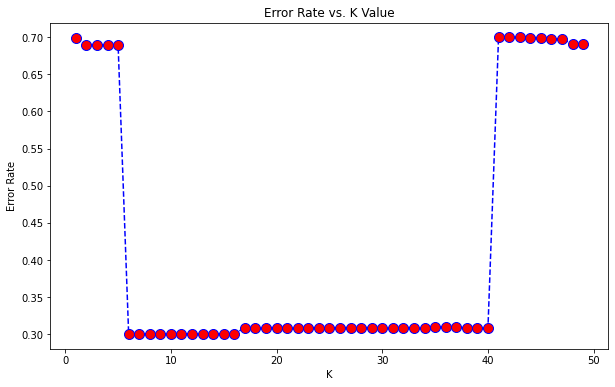

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Bulding model based on the identified value of k**

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train_12, y_train_12)

#Predict the response for test dataset
y_pred_12 = knn.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82    114796
           1       0.23      0.00      0.00     49223

    accuracy                           0.70    164019
   macro avg       0.46      0.50      0.41    164019
weighted avg       0.56      0.70      0.58    164019



In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train_12, y_train_12)

#Predict the response for test dataset
y_pred_12 = knn.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

**11 features**

**Finding k value for KNN**

(793628, 1) (793628, 1)
k value 1 Accuracy: 0.5864649432731708
(793628, 1) (793628, 1)
k value 2 Accuracy: 0.5907566265303139
(793628, 1) (793628, 1)
k value 3 Accuracy: 0.5841048954925986
(793628, 1) (793628, 1)
k value 4 Accuracy: 0.5895192709934629
(793628, 1) (793628, 1)
k value 5 Accuracy: 0.5824958292802169
(793628, 1) (793628, 1)
k value 6 Accuracy: 0.5896969360960047
(793628, 1) (793628, 1)
k value 7 Accuracy: 0.5809636252753179
(793628, 1) (793628, 1)
k value 8 Accuracy: 0.5904416174832541
(793628, 1) (793628, 1)
k value 9 Accuracy: 0.5819565337916505
(793628, 1) (793628, 1)
k value 10 Accuracy: 0.594942466747645
(793628, 1) (793628, 1)
k value 11 Accuracy: 0.5857505027544391
(793628, 1) (793628, 1)
k value 12 Accuracy: 0.5980396356983373
(793628, 1) (793628, 1)
k value 13 Accuracy: 0.5886788268559073
(793628, 1) (793628, 1)
k value 14 Accuracy: 0.6009238585332171
(793628, 1) (793628, 1)
k value 15 Accuracy: 0.5925446178814255
(793628, 1) (793628, 1)
k value 16 Accuracy: 0.609

Text(0, 0.5, 'Error Rate')

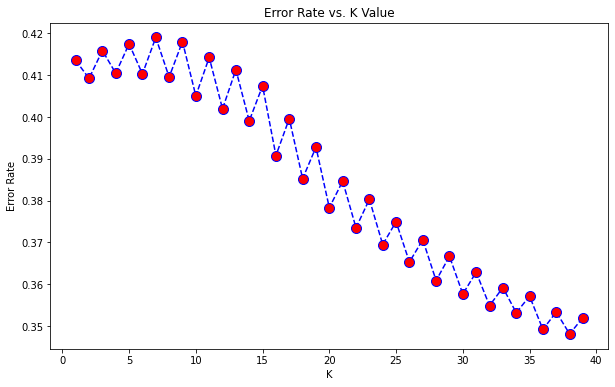

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
k_range = range(1, 40)
for k in k_range:
  #Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model using the training sets
  knn.fit(X_train_11, y_train_11)

  #Predict the response for test dataset
  y_pred = knn.predict(X_test_11)
  y_pred=y_pred.reshape(len(y_pred),1)
  print(np.shape(y_pred), np.shape(y_test_11))
  error_rate.append(np.mean(y_pred != y_test_11))
  #Import scikit-learn metrics module for accuracy calculation
  from sklearn import metrics
  # Model Accuracy, how often is the classifier correct?
  print("k value", k, "Accuracy:",metrics.accuracy_score(y_test_11, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Bulding model based on the identified value of k**

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train_11, y_train_11)

#Predict the response for test dataset
y_pred_11 = knn.predict(X_test_11)
print(classification_report(y_test_11,y_pred_11))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71    554369
           1       0.31      0.29      0.30    239259

    accuracy                           0.59    793628
   macro avg       0.50      0.50      0.50    793628
weighted avg       0.58      0.59      0.59    793628



**10 features**

**Finding k value for KNN**

(793628, 1) (793628, 1)
k value 1 Accuracy: 0.5786312982908869
(793628, 1) (793628, 1)
k value 2 Accuracy: 0.5843959638520818
(793628, 1) (793628, 1)
k value 3 Accuracy: 0.5791705937794533
(793628, 1) (793628, 1)
k value 4 Accuracy: 0.5873179877726088
(793628, 1) (793628, 1)
k value 5 Accuracy: 0.5803285670364453
(793628, 1) (793628, 1)
k value 6 Accuracy: 0.589504150559204
(793628, 1) (793628, 1)
k value 7 Accuracy: 0.582190900522663
(793628, 1) (793628, 1)
k value 8 Accuracy: 0.5916890533096111
(793628, 1) (793628, 1)
k value 9 Accuracy: 0.5827692571330648
(793628, 1) (793628, 1)
k value 10 Accuracy: 0.5941587242385601
(793628, 1) (793628, 1)
k value 11 Accuracy: 0.5864221020427707
(793628, 1) (793628, 1)
k value 12 Accuracy: 0.5969875054811574
(793628, 1) (793628, 1)
k value 13 Accuracy: 0.5891626807521912
(793628, 1) (793628, 1)
k value 14 Accuracy: 0.6014051923571245
(793628, 1) (793628, 1)
k value 15 Accuracy: 0.5935249260358757
(793628, 1) (793628, 1)
k value 16 Accuracy: 0.6072

Text(0, 0.5, 'Error Rate')

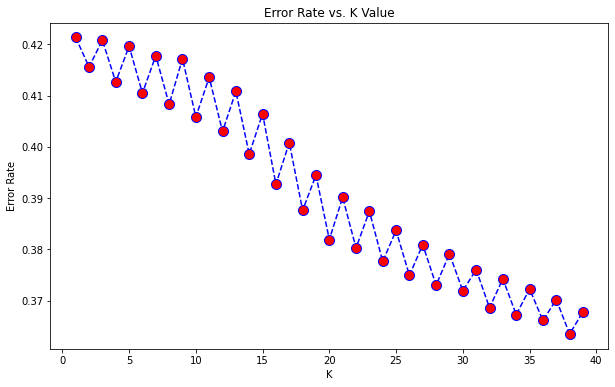

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
k_range = range(1, 40)
for k in k_range:
  #Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model using the training sets
  knn.fit(X_train_10, y_train_10)

  #Predict the response for test dataset
  y_pred = knn.predict(X_test_10)
  y_pred=y_pred.reshape(len(y_pred),1)
  print(np.shape(y_pred), np.shape(y_test_10))
  error_rate.append(np.mean(y_pred != y_test_10))
  #Import scikit-learn metrics module for accuracy calculation
  from sklearn import metrics
  # Model Accuracy, how often is the classifier correct?
  print("k value", k, "Accuracy:",metrics.accuracy_score(y_test_10, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Bulding model based on the identified value of k**

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train_10, y_train_10)

#Predict the response for test dataset
y_pred_10 = knn.predict(X_test_10)
print(classification_report(y_test_10,y_pred_10))

### Logistic Regression

**Simple Logistic Regression**

In [ ]:
#Create LogisticRegression Classifier
lr = LogisticRegression()
#Train the model using the training sets
lr.fit(X_train_11, y_train_11)

#Predict the response for test dataset
y_pred_11 = lr.predict(X_test_11)
print(classification_report(y_test_11,y_pred_11))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82    554369
           1       0.00      0.00      0.00    239259

    accuracy                           0.70    793628
   macro avg       0.35      0.50      0.41    793628
weighted avg       0.49      0.70      0.57    793628



**LogisticRegression - finding best hyper-parameters**

In [23]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
#Create LogisticRegression Classifier
model = LogisticRegression(random_state=0)
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=[(slice(None), slice(None))], scoring=scoring, error_score=0, refit='prec_macro')
grid_result = grid_search.fit(X_train_12, y_train_12)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.973067 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


**LogisticRegression - with best hyper-parameters found in above step**

In [24]:
#Create LogisticRegression Classifier penalty= 'l2',solver= 'newton-cg' C= 10,
lr = LogisticRegression( solver= 'newton-cg',C= 10, penalty= 'l2')
#Train the model using the training sets
lr.fit(X_train_12, y_train_12)

#Predict the response for test dataset
y_pred_12 = lr.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    114796
           1       0.98      0.92      0.95     49223

    accuracy                           0.97    164019
   macro avg       0.97      0.95      0.96    164019
weighted avg       0.97      0.97      0.97    164019



### Naive Bayes

In [27]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_12, y_train_12)
#Predict the response for test dataset
y_pred_12 = gnb_model.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82    114796
           1       0.28      0.02      0.03     49223

    accuracy                           0.69    164019
   macro avg       0.49      0.50      0.43    164019
weighted avg       0.57      0.69      0.58    164019



**Finding hyperparameters**

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1,cv=[(slice(None), slice(None))], n_jobs=-1,scoring='precision')
nbModel_grid.fit(X_train_12, y_train_12)
print(nbModel_grid.best_estimator_)

Fitting 1 folds for each of 100 candidates, totalling 100 fits
GaussianNB(var_smoothing=1.0)


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
# gs_NB = GaussianNB()
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1,cv=[(slice(None), slice(None))], n_jobs=-1)
Data_transformed = PowerTransformer().fit_transform(X_train_12)
nbModel_grid.fit(Data_transformed, y_train_12);
print(nbModel_grid.best_params_)
print(nbModel_grid.best_score_)

Fitting 1 folds for each of 100 candidates, totalling 100 fits
{'var_smoothing': 0.08111308307896872}
0.9460079441773691


**Building model with hyperparameter**

In [28]:
gnb_model = GaussianNB(priors=None,var_smoothing=1.0)
gnb_model.fit(X_train_12, y_train_12)
#Predict the response for test dataset
y_pred_12 = gnb_model.predict(X_test_12)
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82    114796
           1       0.00      0.00      0.00     49223

    accuracy                           0.70    164019
   macro avg       0.35      0.50      0.41    164019
weighted avg       0.49      0.70      0.58    164019



### Stacking ensemble

In [44]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier

In [43]:

# evaluate a given model
def evaluate_model(model, X, y):
	model = model.fit(X_train_12,y_train_12)
	#Predict the response for test dataset
	y_pred = model.predict(X_test_12)
	# Model Accuracy, how often is the classifier correct?
	print("Accuracy:",accuracy_score(y_test_12, y_pred))
	print("Precision:",precision_score(y_test_12, y_pred))
	print(classification_report(y_test_12,y_pred))
	# return scores
	return accuracy_score(y_test_12, y_pred)


In [57]:
# Stacking layers
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')))
	level0.append(('knn',KNeighborsClassifier(n_neighbors=6)))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1)
	return model

In [55]:
def get_models_list():
	models = dict()
	models['stacking'] = get_stacking()
	return models

In [58]:
# get the models to evaluate
models = get_models_list()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, None, None)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

Accuracy: 0.9577183131222602
Precision: 0.9385630133576703
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    114796
           1       0.94      0.92      0.93     49223

    accuracy                           0.96    164019
   macro avg       0.95      0.95      0.95    164019
weighted avg       0.96      0.96      0.96    164019

>stacking 0.958 (0.000)
